In [1]:
import numpy as np                     # Packages for Data Analysis
import pandas as pd
import random as rand
from scipy.signal import correlate, correlation_lags

import matplotlib.pyplot as plt       # Packages for making plots
from matplotlib.patches import FancyArrow
import matplotlib.colors as mcolors
import matplotlib.patches as patches
from matplotlib.patches import Patch, Circle
from matplotlib.lines import Line2D
from scipy.ndimage import gaussian_filter1d

import braingeneers                  # Braigneneers packages for analysis
from braingeneers.analysis.analysis import SpikeData, read_phy_files, load_spike_data, burst_detection, randomize_raster
import braingeneers.data.datasets_electrophysiology as ephys

In [3]:
# # for debugging
# import pickle
# file = open('/home/jovyan/work/Human_Hippocampus/StitchedDataUpdated.pkl', 'rb')
# sd = pickle.load(file)
# file.close()

In [2]:
sd = read_phy_files('/workspaces/human_hippocampus/data/ephys/2023-04-02-e-hc328_unperturbed/derived/kilosort2/hc3.28_hckcr1_chip16835_plated34.2_rec4.2_curated.zip')

/tmp/ipykernel_1964/653605344.py:1: DeprecationWarning: Call to deprecated function (or staticmethod) read_phy_files. (Prefer load_spike_data()) -- Deprecated since version 0.1.13.
  sd = read_phy_files('/workspaces/human_hippocampus/data/ephys/2023-04-02-e-hc328_unperturbed/derived/kilosort2/hc3.28_hckcr1_chip16835_plated34.2_rec4.2_curated.zip')


In [5]:
def plot_raster(sd):
    idces, times = sd.idces_times()
    fig, ax = plt.subplots()

    ax.scatter(times/1000,idces,marker='|',s=1)
    ax.set_xlabel("Time(s)")
    ax.set_ylabel('Unit #')
    plt.show()
    
def interspike(sd):
    # Interspike-intervals of 2 select neurons
    isis_raw = sd.interspike_intervals()
    # Remove all isi's greater than 100ms. As there are likely neurons not following periodic firing pattern
    isis=[]
    for i in range(len(isis_raw)):   
        isi=isis_raw[i]
        isis = isis + isi[isi<100].tolist() 
        
    # Plot the isi's
    plt.xlim(0,100)
    plt.hist(isis, bins=50)
    plt.xlabel('Time bin(ms)')
    plt.ylabel('ISI count')
    plt.show()
    
def correlation(sd):
    # Correlation
    corr = np.zeros((sd.N,sd.N)) #inds by inds

    dense_raster = sd.raster(bin_size=1) # in ms
    sigma = 5                            # Blur it
    dense_raster = gaussian_filter1d(dense_raster.astype(float),sigma=sigma) 
    corr=np.corrcoef( dense_raster )
    
    plt.imshow(corr)
    plt.xlabel("Neuron index")
    plt.ylabel("Neuron index")
    plt.show()
    
def raster_analysis(sd, seconds=20):
    # Zoomed Raster and pop rate
    # Get coordinates for raster
    idces, times = sd.idces_times()

    # Get population rate for everything
    pop_rate = sd.binned(bin_size=1)# in ms
    # Lets smooth this to make it neater
    sigma = 5
    pop_rate_smooth = gaussian_filter1d(pop_rate.astype(float),sigma=sigma) 
    t = np.linspace(0,sd.length,pop_rate.shape[0])/1000

    fig, ax = plt.subplots()

    ax.scatter(times/1000,idces,marker='|',s=1)
    ax2 = ax.twinx()
    ax2.plot(t,pop_rate_smooth,c='r')

    ax.set_xlim(0,seconds)
    ax.set_xlabel("Time(s)")
    ax.set_ylabel('Unit #')
    ax2.set_ylabel('Firing Rate')
    plt.show()
    
def plot_rates(sd):
    rates = sd.rates()
    plt.hist(rates, bins=50)
    plt.xlabel('Firing rate, Hz')
    plt.ylabel('Number neural units')
    plt.show()

In [3]:
def plot_raster(sd):
    idces, times = sd.idces_times()
    # Adjust the figsize parameter to change the figure size; (width, height) in inches
    fig, ax = plt.subplots(figsize=(10, 6))  # Example: 10 inches wide by 6 inches tall

    ax.scatter(times/1000, idces, marker='|', s=1)
    ax.set_xlabel("Time(s)")
    ax.set_ylabel('Unit #')
    plt.show()


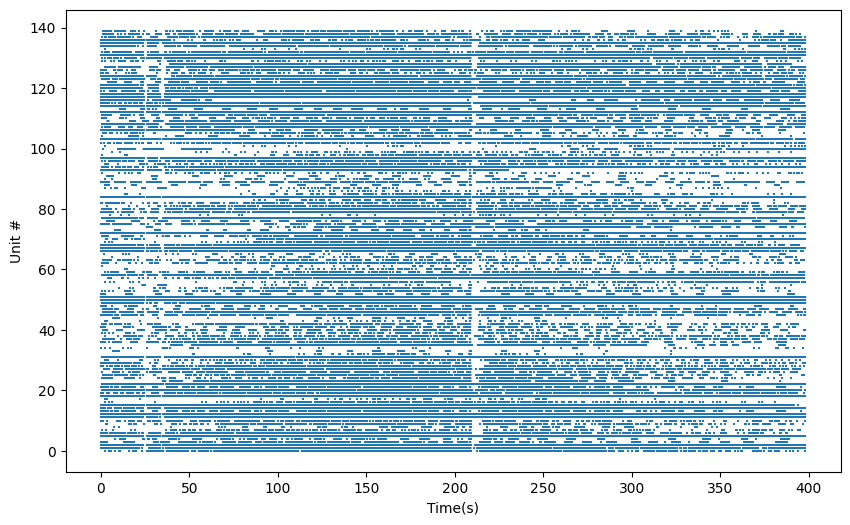

In [4]:
plot_raster(sd)

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from scipy.stats import binned_statistic_2d

In [7]:
def calculate_mean_firing_rates(spike_data):
    # Compute mean firing rates for each neuron
    firing_rates = [len(train) / spike_data.length for train in spike_data.train]
    return firing_rates

In [8]:
calculate_mean_firing_rates(sd)

[0.002546215762155324,
 0.002621547589438026,
 0.004125673074182641,
 0.0016573002002194417,
 0.00106468982559552,
 0.0039046997141533816,
 0.0021369128339193103,
 0.0006126988618993087,
 0.00036661489277581586,
 0.0014614374492844166,
 0.0011575990792441857,
 0.0056674644725686054,
 0.005544422488006859,
 0.0011601101401536092,
 0.00198122705753506,
 0.003083582796771931,
 0.0005524334000731472,
 0.00016070789820309738,
 0.005386225650713185,
 0.000981824815584548,
 0.009539520394899484,
 0.0011626212010630325,
 0.0031061823449567414,
 0.003236757512246758,
 0.0013961498656394084,
 0.0008688270746604952,
 0.000994380120131665,
 0.0028324767058295914,
 0.0008989598055735759,
 0.0007683846382835594,
 0.0006302762882652725,
 0.004276336728748044,
 0.0003013273091308076,
 0.00020088487275387172,
 0.0001556857763842506,
 0.003877078044149724,
 0.0014262825965524891,
 0.0011575990792441857,
 0.000986846937403395,
 0.0005800550700768046,
 0.006712065810888739,
 0.0018079638547848454,
 0.0013

In [11]:
def get_neuron_positions(spike_data):
    # Extract neuron positions from spike_data
    neuron_x = []
    neuron_y = []
    for neuron in spike_data.neuron_data[0].values():
        neuron_x.append(neuron['position'][0])
        neuron_y.append(neuron['position'][1])
    neuron_positions = np.array([neuron_x, neuron_y]).T
    return neuron_positions

In [12]:
get_neuron_positions(sd)

/tmp/ipykernel_1964/1460884655.py:5: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in spike_data.neuron_data[0].values():


array([[ 770. , 1505. ],
       [1155. , 1295. ],
       [1120. ,  945. ],
       [1015. , 1277.5],
       [1050. , 1312.5],
       [1085. ,  910. ],
       [1260. , 1225. ],
       [1172.5,  787.5],
       [1242.5,  752.5],
       [1190. , 1120. ],
       [1085. , 1155. ],
       [1365. ,  945. ],
       [1207.5,  682.5],
       [1120. , 1190. ],
       [1102.5,  647.5],
       [1067.5,  647.5],
       [1260. , 1347.5],
       [1190. , 1417.5],
       [1207.5,  612.5],
       [1137.5,  577.5],
       [1400. , 1295. ],
       [1435. , 1050. ],
       [1312.5,  507.5],
       [1050. , 1487.5],
       [ 945. , 1575. ],
       [1365. , 1382.5],
       [1085. , 1155. ],
       [ 945. , 1032.5],
       [1225. , 1015. ],
       [1155. ,  945. ],
       [1190. ,  910. ],
       [1260. ,  980. ],
       [1295. , 1120. ],
       [1487.5,  997.5],
       [1487.5,  682.5],
       [1295. , 1190. ],
       [1085. ,  910. ],
       [1207.5,  577.5],
       [1207.5,  577.5],
       [1435. , 1225. ],


In [23]:
def calculate_distances_and_angles(neuron_positions):
    # Calculate pairwise distances and angles between neurons
    distances = np.zeros((len(neuron_positions), len(neuron_positions)))
    angles = np.zeros((len(neuron_positions), len(neuron_positions)))

    for i, pos_i in enumerate(neuron_positions):
        for j, pos_j in enumerate(neuron_positions):
            if i != j:
                dy = pos_j[1] - pos_i[1]
                dx = pos_j[0] - pos_i[0]
                distances[i, j] = np.hypot(dx, dy)
                angles[i, j] = np.arctan2(dy, dx)
    
    return distances, angles

In [15]:
n_positions = get_neuron_positions(sd)

/tmp/ipykernel_1964/1460884655.py:5: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in spike_data.neuron_data[0].values():


In [28]:
n_positions = get_neuron_positions(sd)
max_x_pos = np.max(n_positions[:, 0])
max_y_pos = np.max(n_positions[:, 1])
min_x_pos = np.min(n_positions[:, 0])
min_y_pos = np.min(n_positions[:, 1])
print("Max x position:", max_x_pos)
print("Max y position:", max_y_pos)
print("Min x position:", min_x_pos)
print("Min y position:", min_y_pos)

Max x position: 1557.5
Max y position: 2047.5
Min x position: 490.0
Min y position: 52.5


/tmp/ipykernel_1964/1460884655.py:5: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in spike_data.neuron_data[0].values():


In [24]:
calculate_distances_and_angles(n_positions)

(array([[   0.        ,  438.54874301,  660.37867924, ...,  517.06503459,
         1063.04397839, 1025.50597268],
        [ 438.54874301,    0.        ,  351.74564674, ...,  905.44533242,
          709.12798563,  653.38541459],
        [ 660.37867924,  351.74564674,    0.        , ..., 1174.58769362,
          402.88025516,  371.23106012],
        ...,
        [ 517.06503459,  905.44533242, 1174.58769362, ...,    0.        ,
         1575.87475708, 1534.12230608],
        [1063.04397839,  709.12798563,  402.88025516, ..., 1575.87475708,
            0.        ,   78.26237921],
        [1025.50597268,  653.38541459,  371.23106012, ..., 1534.12230608,
           78.26237921,    0.        ]]),
 array([[ 0.        , -0.49934672, -1.01219701, ...,  1.98902066,
         -0.9964915 , -0.93070817],
        [ 2.64224593,  0.        , -1.67046498, ...,  2.28780815,
         -1.29588649, -1.21516044],
        [ 2.12939564,  1.47112767,  0.        , ...,  2.06776493,
         -0.97074611, -0.785398

In [31]:
def bin_distances_and_angles(distances, angles, spatial_range, num_bins):
    # Bin distances and angles into histograms within the defined spatial range
    distance_bins = np.linspace(spatial_range[0], spatial_range[1], num_bins + 1)
    print(distance_bins)
    angle_bins = np.linspace(-np.pi, np.pi, num_bins + 1)
    print(angle_bins)
    distance_hist = binned_statistic_2d(distances.flatten(), angles.flatten(), 
                                        np.ones(distances.size), 
                                        statistic='count', 
                                        bins=[distance_bins, angle_bins])[0]
    
    return distance_hist

In [18]:
def spatial_averaging(distance_hist, sliding_window_size):
    # Apply spatial sliding window averaging on the histogram data
    kernel = np.ones((sliding_window_size, sliding_window_size))
    smoothed_hist = np.apply_along_axis(lambda m: np.convolve(m, kernel, mode='same'), 
                                        axis=0, arr=distance_hist)
    return smoothed_hist

In [19]:
def normalize_and_color_code(smoothed_hist, n_neurons):
    # Normalize and color code the histogram data
    # Assuming 3 standard deviations from mean is the threshold for pure color
    mean = np.mean(smoothed_hist)
    std = np.std(smoothed_hist)
    normalized_hist = (smoothed_hist - mean) / (3 * std / np.sqrt(n_neurons))
    # Clipping the values to the range [-1, 1] for color coding
    normalized_hist = np.clip(normalized_hist, -1, 1)
    return normalized_hist

In [20]:
def plot_biases(normalized_hist, distance_bins, angle_bins):
    # Plot the spatial biases as a heatmap
    fig, ax = plt.subplots()
    cax = ax.imshow(normalized_hist, extent=(distance_bins[0], distance_bins[-1], 
                                             angle_bins[0], angle_bins[-1]), 
                    interpolation='none', cmap='coolwarm', aspect='auto')
    cbar = fig.colorbar(cax)
    cbar.set_label('Normalized Activity')
    ax.set_xlabel('Distance (μm)')
    ax.set_ylabel('Angle (radians)')
    plt.show()

In [ ]:
Max x position: 1557.5
Max y position: 2047.5
Min x position: 490.0
Min y position: 52.5


In [32]:
# Using the functions defined above
neuron_positions = get_neuron_positions(sd)
distances, angles = calculate_distances_and_angles(neuron_positions)
spatial_range = [400, 1600] # μm
time_window = [-20, 20] # event ranks
num_bins = 6

distance_hist = bin_distances_and_angles(distances, angles, spatial_range, num_bins)
sliding_window_size = 17 # Assuming this is the size for the spatial averaging
smoothed_hist = spatial_averaging(distance_hist, sliding_window_size)
n_neurons = len(neuron_positions)
normalized_hist = normalize_and_color_code(smoothed_hist, n_neurons)

# Plotting the biases
plot_biases(normalized_hist, spatial_range, time_window)

[ 400.  600.  800. 1000. 1200. 1400. 1600.]
[-3.14159265 -2.0943951  -1.04719755  0.          1.04719755  2.0943951
  3.14159265]


/tmp/ipykernel_1964/1460884655.py:5: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in spike_data.neuron_data[0].values():


ValueError: object too deep for desired array